In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score,recall_score

# Create Data Frame using pandas using read_csv 
df = pd.read_csv("Iris.csv")


In [2]:
# To get first n rows for the object based on position.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Compute Statistical summary of the data frame.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check the shape of the Data Frame
print(df.shape)

(150, 6)


In [6]:
# Checking for Duplicates 

df.duplicated().sum()          # No Duplicates present in the data set       

0

In [7]:
# Find Null values Handling Null values

df.dropna(axis=0,inplace=True)
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[

In [8]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

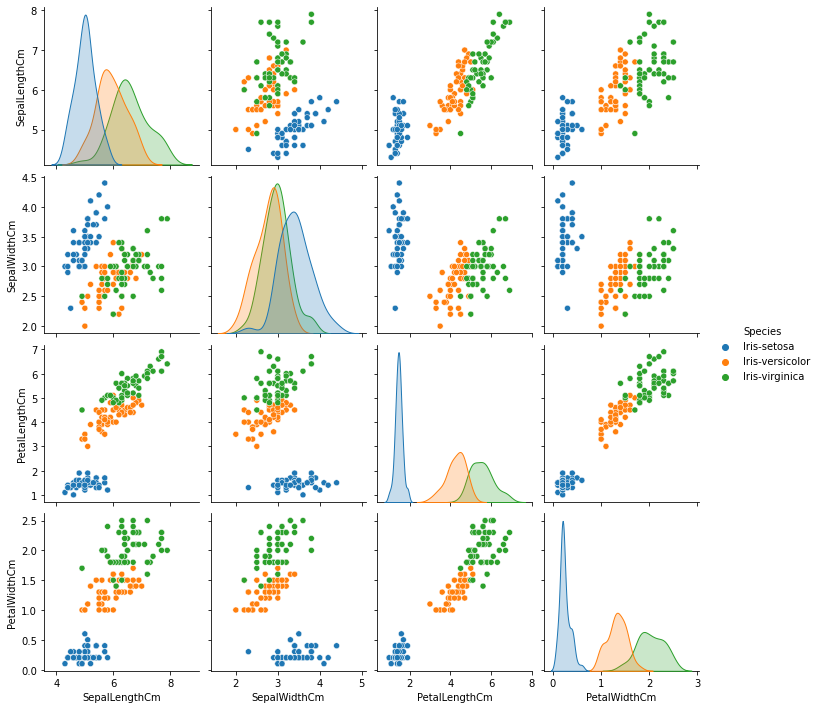

In [9]:
# Data Visualization Techiniques  ex: Scatter plot, Box Plot,Pair plot,bar charts
sns.pairplot(df,vars = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],hue="Species")
plt.show()

In [10]:
# Observations form the above pairplot 
""" 1. Here we can easily Identified Setosa flowers. Virginica and Versicolor have overlap with each other
    2.Petal length and petal width are the most important features to identify the type of flowers 
     why because if we observe the Scatter plots of petal length and petal width there is less overlap 
     between the Versicolor and Virginica
     
"""

' 1. Here we can easily Identified Setosa flowers. Virginica and Versicolor have overlap with each other\n    2.Petal length and petal width are the most important features to identify the type of flowers \n     why because if we observe the Scatter plots of petal length and petal width there is less overlap \n     between the Versicolor and Virginica\n     \n'

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

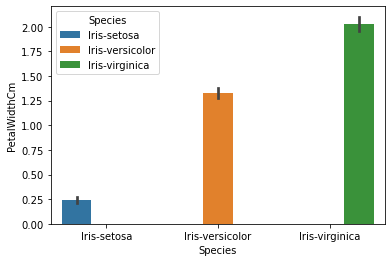

In [11]:
sns.barplot(x = 'Species',y = 'PetalWidthCm',hue = 'Species',data = df)

<AxesSubplot:>

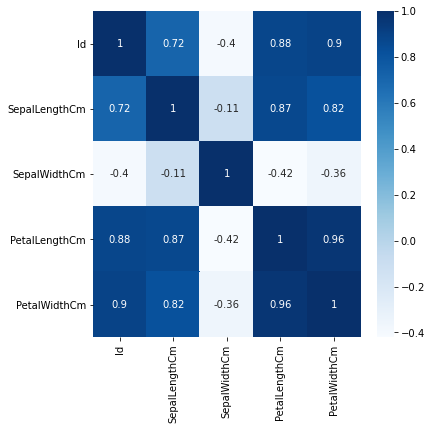

In [12]:

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [13]:
""" From the above heat map we conculde that 
negative correlation occurs at: Sepal Width
positive correlation occurs at : Petal length , Petal width, sepal length """

' From the above heat map we conculde that \nnegative correlation occurs at: Sepal Width\npositive correlation occurs at : Petal length , Petal width, sepal length '

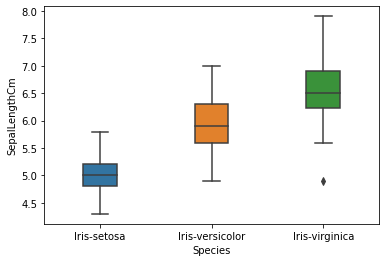

In [14]:
sns.boxplot( x=df["Species"], y=df["SepalLengthCm"], width=0.3);


New Shape:  (150, 6)


<AxesSubplot:xlabel='SepalLengthCm'>

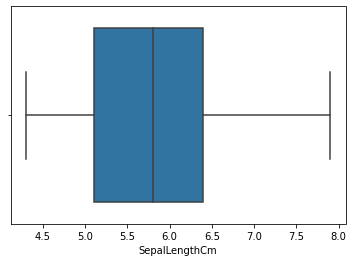

In [15]:
Q1 = np.percentile(df['SepalLengthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['SepalLengthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1


upper = np.where(df['SepalLengthCm'] >= (Q3 + (1.5*IQR)))
  
# Lower bound
lower = np.where(df['SepalLengthCm'] <= (Q1 - (1.5*IQR)))
  
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='SepalLengthCm', data=df)

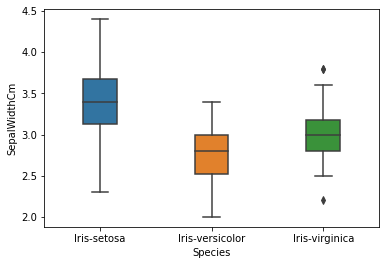

In [16]:
sns.boxplot( x=df["Species"], y=df["SepalWidthCm"], width=0.3);

<AxesSubplot:xlabel='SepalWidthCm'>

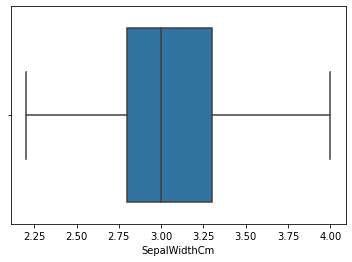

In [17]:
Q1 = np.percentile(df['SepalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['SepalWidthCm'] >= (Q3 + (1.5*IQR)))
  
lower = np.where(df['SepalWidthCm'] <= (Q1 - (1.5*IQR)))
  
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
sns.boxplot(x='SepalWidthCm', data=df)

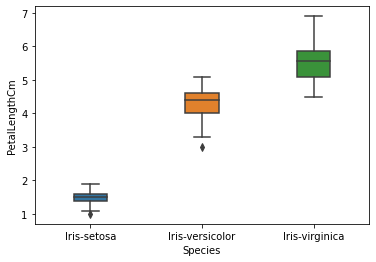

In [18]:
sns.boxplot( x=df["Species"], y=df["PetalLengthCm"], width=0.3);

<AxesSubplot:xlabel='PetalLengthCm'>

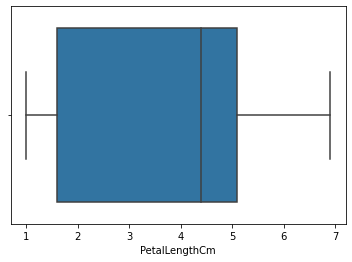

In [19]:
Q1 = np.percentile(df['PetalLengthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['PetalLengthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['PetalLengthCm'] >= (Q3 + (1.5*IQR)))
  
lower = np.where(df['PetalLengthCm'] <= (Q1 - (1.5*IQR)))
  
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
sns.boxplot(x='PetalLengthCm', data=df)

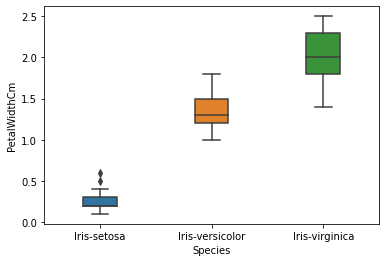

In [20]:
sns.boxplot( x=df["Species"], y=df["PetalWidthCm"], width=0.3);

<AxesSubplot:xlabel='PetalWidthCm'>

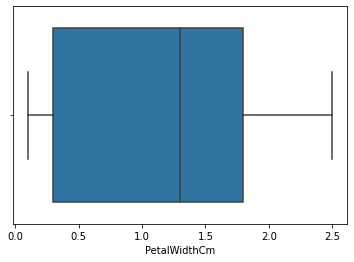

In [21]:
Q1 = np.percentile(df['PetalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['PetalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['PetalWidthCm'] >= (Q3 + (1.5*IQR)))
  
lower = np.where(df['PetalWidthCm'] <= (Q1 - (1.5*IQR)))
  
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
sns.boxplot(x='PetalWidthCm', data=df)

In [22]:
df.shape

(146, 6)

In [23]:
x = df.drop(['Species'], axis=1)
y = df['Species']

In [24]:
# Split the data in to training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
predicted_values = model.predict(x_test)


In [26]:
# Check the model performance
print(accuracy_score(y_test,predicted_values))


1.0
